<a href="https://colab.research.google.com/github/IHS618/Git-Tutorial/blob/master/17_HTTP_%ED%86%B5%EC%8B%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install --upgrade requests

In [6]:
# 통신 기능 제공
import requests

In [7]:
simple_text_url = "http://itpaper.co.kr/data/simple_text.txt"

In [8]:
r = requests.get(simple_text_url)
r

<Response [200]>

In [9]:
if r.status_code != 200:
  # 에러코드와 에러메시지를 문자열로 구성
  err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
  # 강제로 에러를 발생시킨다.
  raise Exception(err_msg)

In [10]:
# 인코딩 형식 지정 (대상 파일이 저장된 방식을 명시해야 함)
r.encoding = "utf-8"
# 텍스트 출력
print(r.text)

Hello Python~!!!
안녕하세요. 파이썬~!!!



In [12]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36"
r = requests.get("https://datalab.naver.com/",
                 headers={'User-agent': user_agent, 'referer': None})
if r.status_code != 200:
  # 에러코드와 에러메시지 출력
  err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
  raise Exception(err_msg)

r.encoding = "utf-8"
r.text

'<!DOCTYPE html>\n<html lang="ko">\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=1200">\n    <title>네이버 데이터랩</title>\n    \n    <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.datalab/202107120236/css/datalab.css">\n    <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/static.datalab/202107120236/css/graph.css">\n\n    <link rel="icon" sizes="192x192" href="https://ssl.pstatic.net/static.datalab/202107120236/img/favicon/android_legacy_xxxhpdi_192x192.png" >\n    <link rel="icon" sizes="144x144" href="https://ssl.pstatic.net/static.datalab/202107120236/img/favicon/android_legacy_xxhpdi_144x144.png" >\n    <link rel="icon" sizes="96x96" href="https://ssl.pstatic.net/static.datalab/202107120236/img/favicon/android_legacy_xhdpi_96x96.png" >\n    <link rel="icon" sizes="72x72" href="https://ssl.pstatic.net/static.datalab/202107120236/img/favicon/android_l

In [13]:
# 다운로드 할 대상의 URL
file_url = "http://itpaper.co.kr/data/sample.png"

# URL에 파일을 다운로드 하기 위해 접속 -> stream=True 파라미터 추가
r = requests.get(file_url,
                  headers={'User-agent': user_agent, 'referer': None},
                  stream=True)
# 접속 성공/실패 여부 확인
if r.status_code != 200:
  # 에러코드와 에러메시지 출력
  err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
  raise Exception(err_msg)

In [14]:
# 수집 결과의 바이너리(이진값) 데이터를 추출
data = r.raw.read()

# 추출한 데이터를 저장# -> 'w': 텍스트 쓰기 모드, 'wb': 바이너리(이진값) 쓰기 모드
with open("download.png", 'wb') as f:
  f.write(data)
  print("다운로드 완료")

다운로드 완료


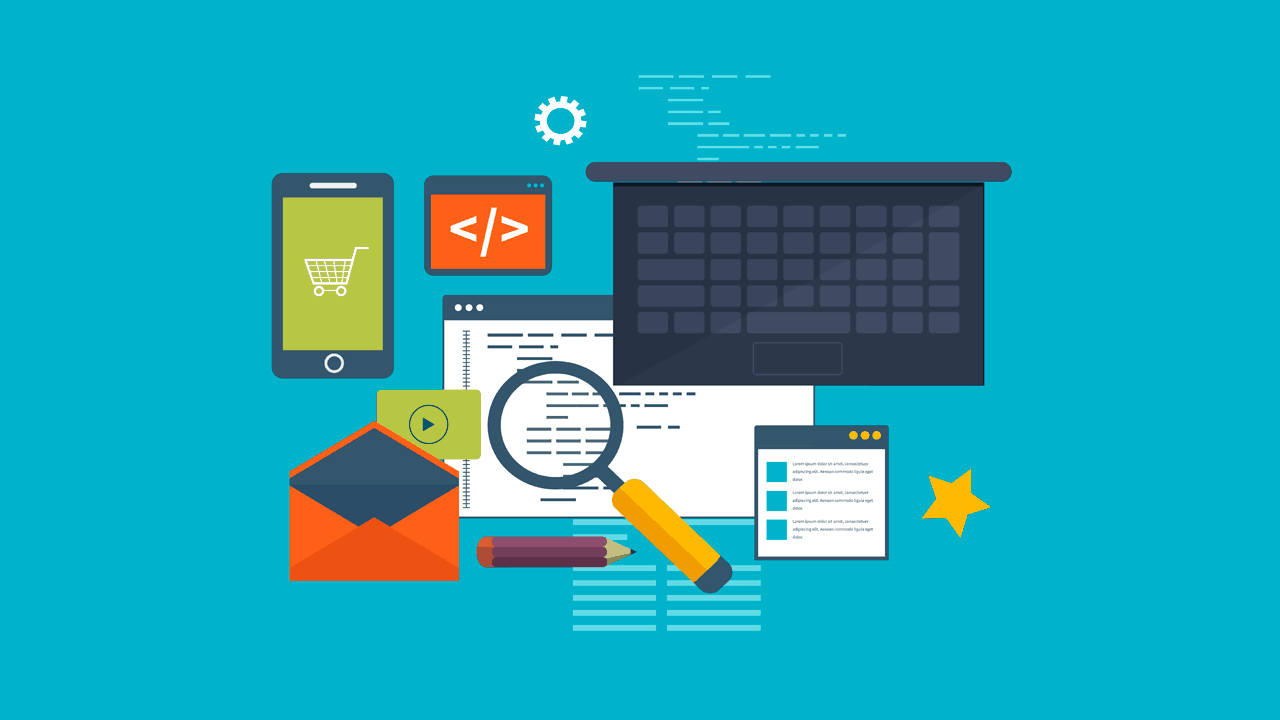

In [15]:
from IPython.display import Image
Image("./download.png")